Individual modelling of 3 datasets (alomost done)
1. Come up with a relation of connecting 3 models (area burnt, co2 emitted, air pollution caused.)
2. We need to come up with a relation/model of the amount of co2 released(tons) and air poluted(tons) but the area of land burnt(mil hectares) due to wild fire.
3. Predicting and coming up with the solution like if x amount of land burnt is saved then, y amount of co2 releasing will be stopped and hence z amount of air pollution is reduced per year.
4. Identifying the ways to reduce land burnt area in wildfires per year.
5. We can do EDA

In [364]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns

# Releasing memory
import gc

# Operating system interfaces
import os

# matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120  # High resolution figures
plt.rcParams['figure.figsize'] = [8, 6]  # Size of figures

import seaborn as sns
sns.set_theme(style='darkgrid')  # Seaborn dark grid style for plots
palette = sns.color_palette()  # Default color palette

# Root directory for the dataset
data_root = './data/'

# EDA for the 3 Data Sets.
These Datasets include Data from all the countries all over the world where the wildfire occur.
The Data observed is related to: 
1. Area Burnt in wildfires from 2003 - 2024 (Unit: - Million Hectares)
2. CO2 Emmissions due to wildfires from 2003 - 2024 (Unit: - Tonnes)
3. PM2.5 Emmissions due to wildfires from 2003 - 2024 (Unit: - Tonnes)


In [365]:
# Paths for data files
CO2EmmissionsAnnually_AllCountries_2003To2024_data = pd.read_csv(data_root + 'annual-carbon-dioxide-emissions.csv')
PM25EmissionsAnnually_AllCountries_2003To2024_data = pd.read_csv(data_root + 'annual-pm25-emissions-from-wildfires.csv')
AreaBurntAnnually_AllCountries_2012To2024_data = pd.read_csv(data_root + 'annual-area-burnt-per-wildfire.csv')

#### Listing all the Countries in the Datasets

In [366]:
# Print the unique values of the "Entity" column
unique_entities = CO2EmmissionsAnnually_AllCountries_2003To2024_data['Entity'].unique()
print("Unique values of the Entity column:")
print(unique_entities)

Unique values of the Entity column:
['Afghanistan' 'Africa' 'Akrotiri and Dhekelia' 'Aland Islands' 'Albania'
 'Algeria' 'American Samoa' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Bouvet Island' 'Brazil' 'British Indian Ocean Territory'
 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Cocos Islands' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Er

In [367]:
# Print the unique values of the "Entity" column
unique_entities = PM25EmissionsAnnually_AllCountries_2003To2024_data['Entity'].unique()
print("Unique values of the Entity column:")
print(unique_entities)

Unique values of the Entity column:
['Afghanistan' 'Africa' 'Akrotiri and Dhekelia' 'Aland Islands' 'Albania'
 'Algeria' 'American Samoa' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Bouvet Island' 'Brazil' 'British Indian Ocean Territory'
 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Cocos Islands' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Er

In [368]:
# Print the unique values of the "Entity" column
unique_entities = AreaBurntAnnually_AllCountries_2012To2024_data['Entity'].unique()
print("Unique values of the Entity column:")
print(unique_entities)

Unique values of the Entity column:
['Afghanistan' 'Africa' 'Akrotiri and Dhekelia' 'Albania' 'Algeria'
 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'East Timor'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Europe' 'Falkland Islands' 'Fiji' 'Finland'
 'France' 'French Guiana' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Greenland' 'Guadeloupe' 'Guam' 'Guatemala' 'Guinea'


#### Summary of Each Dataframes

In [369]:
# Display summary of each dataframe
print("Summary of CO2 Emissions Annually:")
print(CO2EmmissionsAnnually_AllCountries_2003To2024_data.info())

Summary of CO2 Emissions Annually:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5676 entries, 0 to 5675
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           5676 non-null   object 
 1   Code                             5544 non-null   object 
 2   Year                             5676 non-null   int64  
 3   Annual_carbon_dioxide_emissions  5676 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 177.5+ KB
None


In [370]:
# Display summary of each dataframe
print("Summary of PM25 Emissions Annually:")
print(PM25EmissionsAnnually_AllCountries_2003To2024_data.info())

Summary of PM25 Emissions Annually:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5676 entries, 0 to 5675
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Entity                                 5676 non-null   object 
 1   Code                                   5544 non-null   object 
 2   Year                                   5676 non-null   int64  
 3   Annual PM2.5 emissions from wildfires  5676 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 177.5+ KB
None


In [371]:
# Display summary of each dataframe
print("Summary of Area Burnt Annually:")
print(AreaBurntAnnually_AllCountries_2012To2024_data.info())

Summary of Area Burnt Annually:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390 entries, 0 to 2389
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          2390 non-null   object 
 1   Code                            2312 non-null   object 
 2   Year                            2390 non-null   int64  
 3   Annual_Area_Burnt_per_Wildfire  2390 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.8+ KB
None


In [372]:
CO2EmmissionsAnnually_AllCountries_2003To2024_data['Annual_carbon_dioxide_emissions']= CO2EmmissionsAnnually_AllCountries_2003To2024_data['Annual_carbon_dioxide_emissions'].div(10**6)
PM25EmissionsAnnually_AllCountries_2003To2024_data['Annual PM2.5 emissions from wildfires']= PM25EmissionsAnnually_AllCountries_2003To2024_data['Annual PM2.5 emissions from wildfires'].div(10**6)
AreaBurntAnnually_AllCountries_2012To2024_data['Annual_Area_Burnt_per_Wildfire']= AreaBurntAnnually_AllCountries_2012To2024_data['Annual_Area_Burnt_per_Wildfire'].div(10**6)

#### Summary Statics and Shape of the Dataframes

In [373]:
# CO2 Emissions Annually
print("Summary statistics and shape of CO2 Emissions Annually:")
print(CO2EmmissionsAnnually_AllCountries_2003To2024_data['Annual_carbon_dioxide_emissions'].describe())
print("\n\nShape of CO2 Emissions Annually:", CO2EmmissionsAnnually_AllCountries_2003To2024_data.shape)

Summary statistics and shape of CO2 Emissions Annually:
count    5676.000000
mean       72.041115
std       450.270357
min         0.000000
25%         0.002006
50%         0.345146
75%         8.162184
max      7812.222500
Name: Annual_carbon_dioxide_emissions, dtype: float64


Shape of CO2 Emissions Annually: (5676, 4)


In [374]:
# PM25 Emissions Annually
print("\nSummary statistics and shape of PM25 Emissions Annually:")
print(PM25EmissionsAnnually_AllCountries_2003To2024_data['Annual PM2.5 emissions from wildfires'].describe())
print("\n\nShape of PM25 Emissions Annually:", PM25EmissionsAnnually_AllCountries_2003To2024_data.shape)


Summary statistics and shape of PM25 Emissions Annually:
count    5676.000000
mean        0.313457
std         1.936572
min         0.000000
25%         0.000009
50%         0.001449
75%         0.032625
max        36.573976
Name: Annual PM2.5 emissions from wildfires, dtype: float64


Shape of PM25 Emissions Annually: (5676, 4)


In [375]:
# Area Burnt Annually
print("\nSummary statistics and shape of Area Burnt Annually:")
print(AreaBurntAnnually_AllCountries_2012To2024_data['Annual_Area_Burnt_per_Wildfire'].describe())
print("\n\nShape of Area Burnt Annually:", AreaBurntAnnually_AllCountries_2012To2024_data.shape)


Summary statistics and shape of Area Burnt Annually:
count    2390.000000
mean        0.009055
std         0.007812
min         0.000003
25%         0.002481
50%         0.007804
75%         0.013625
max         0.061460
Name: Annual_Area_Burnt_per_Wildfire, dtype: float64


Shape of Area Burnt Annually: (2390, 4)


# EDA for the 3 Data Sets. Country: United Stated.
The Data observed is related to: 
1.  due to wildfires from 2003 - 2024 (Unit: - Tonnes)
2. PM2.5 Emmissions due to wildfires from 2003 - 2024 (Unit: - Tonnes)
3. Area Burnt in wildfires from 2003 - 2024 (Unit: - Million Hectares)

### Flitering DF for United States Specific Data.

#### CO2 Emmissions

In [376]:
fliterCountry = 'United States'  # Replace 'United States' with the Country you want to filter by.
CO2Emmissions_2003To2024_USA = CO2EmmissionsAnnually_AllCountries_2003To2024_data[CO2EmmissionsAnnually_AllCountries_2003To2024_data['Entity'] == fliterCountry]
print(CO2Emmissions_2003To2024_USA)

             Entity Code  Year  Annual_carbon_dioxide_emissions
5346  United States  USA  2003                       145.504200
5347  United States  USA  2004                       238.385860
5348  United States  USA  2005                       223.026830
5349  United States  USA  2006                       156.392270
5350  United States  USA  2007                       197.859200
5351  United States  USA  2008                       124.408456
5352  United States  USA  2009                       188.683550
5353  United States  USA  2010                       102.593990
5354  United States  USA  2011                       181.024450
5355  United States  USA  2012                       186.042080
5356  United States  USA  2013                       148.493970
5357  United States  USA  2014                       114.694104
5358  United States  USA  2015                       203.674660
5359  United States  USA  2016                       154.846320
5360  United States  USA  2017          

In [377]:
# Display summary of each dataframe
print("Summary of CO2 Emissions Annually:")
print(CO2Emmissions_2003To2024_USA.info())

# Removing year 2024 data because it is not for complete year.
CO2Emmissions_2003To2023_USA = CO2Emmissions_2003To2024_USA[:-1]

# CO2 Emissions Annually
print("\n\nSummary statistics and shape of CO2 Emissions Annually:")
print(CO2Emmissions_2003To2023_USA['Annual_carbon_dioxide_emissions'].describe())
print("\n\nShape of CO2 Emissions Annually:", CO2Emmissions_2003To2023_USA.shape)

Summary of CO2 Emissions Annually:
<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 5346 to 5367
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           22 non-null     object 
 1   Code                             22 non-null     object 
 2   Year                             22 non-null     int64  
 3   Annual_carbon_dioxide_emissions  22 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 880.0+ bytes
None


Summary statistics and shape of CO2 Emissions Annually:
count     21.000000
mean     169.203781
std       41.232700
min       91.641736
25%      145.504200
50%      174.504530
75%      197.859200
max      238.385860
Name: Annual_carbon_dioxide_emissions, dtype: float64


Shape of CO2 Emissions Annually: (21, 4)


In [378]:
# Calculate percentage change between consecutive years
CO2Emmissions_2003To2023_USA['Percentage_Change'] = CO2Emmissions_2003To2023_USA['Annual_carbon_dioxide_emissions'].pct_change() * 100

# Print the DataFrame with percentage change
print(CO2Emmissions_2003To2023_USA)

             Entity Code  Year  Annual_carbon_dioxide_emissions  \
5346  United States  USA  2003                       145.504200   
5347  United States  USA  2004                       238.385860   
5348  United States  USA  2005                       223.026830   
5349  United States  USA  2006                       156.392270   
5350  United States  USA  2007                       197.859200   
5351  United States  USA  2008                       124.408456   
5352  United States  USA  2009                       188.683550   
5353  United States  USA  2010                       102.593990   
5354  United States  USA  2011                       181.024450   
5355  United States  USA  2012                       186.042080   
5356  United States  USA  2013                       148.493970   
5357  United States  USA  2014                       114.694104   
5358  United States  USA  2015                       203.674660   
5359  United States  USA  2016                       154.84632

/var/folders/lz/06glpb2526qgqhtf0pvflrz80000gn/T/ipykernel_83811/3934785471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CO2Emmissions_2003To2023_USA['Percentage_Change'] = CO2Emmissions_2003To2023_USA['Annual_carbon_dioxide_emissions'].pct_change() * 100


### CO2 Emissions
### Plotting Stuff

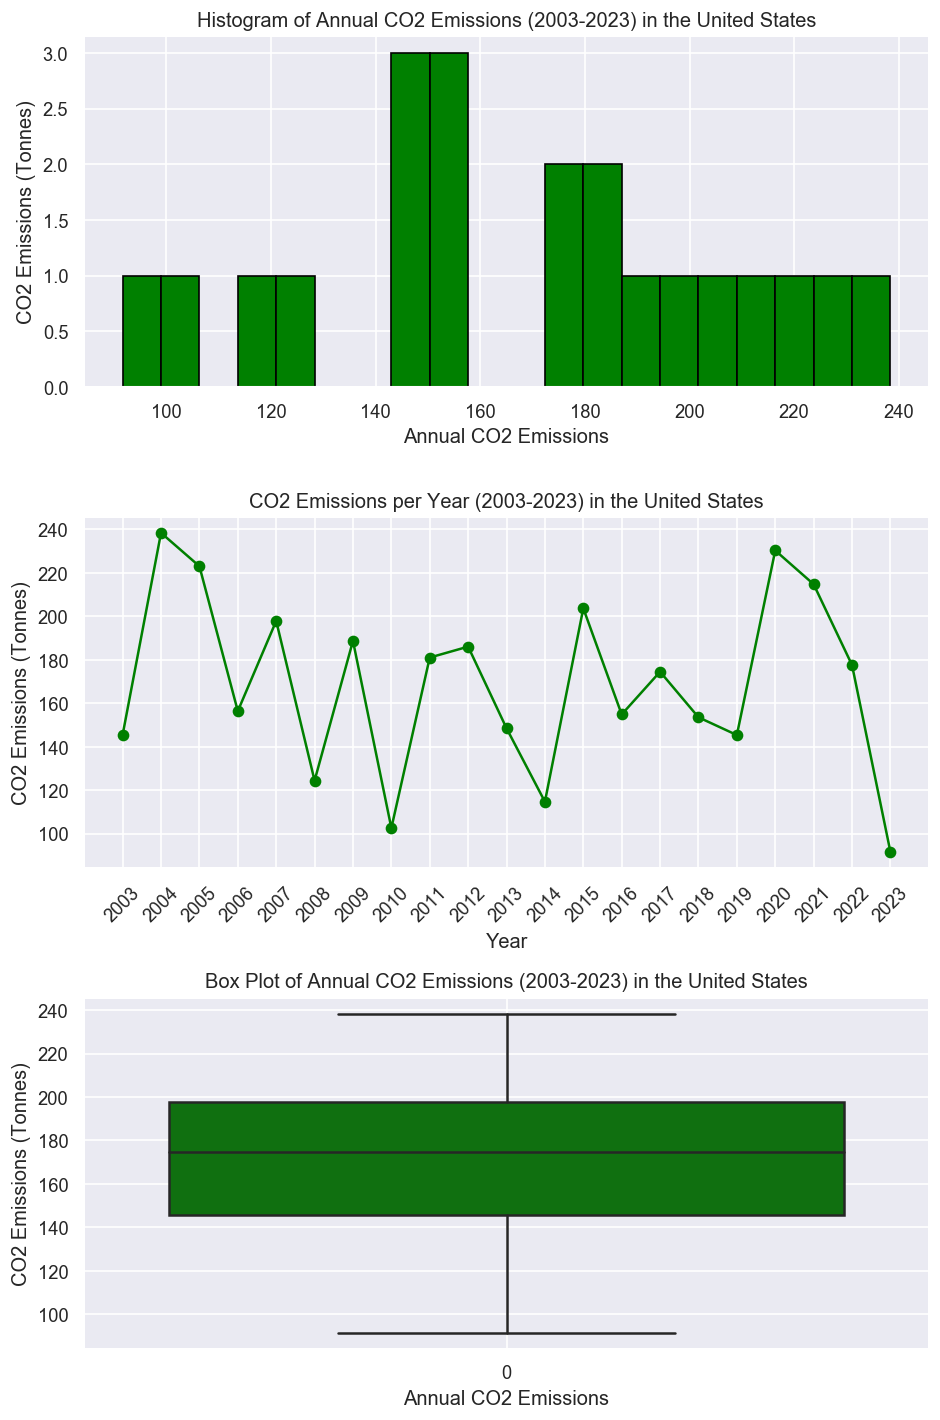

In [379]:
# Convert years and emissions to numpy arrays
years = np.array(CO2Emmissions_2003To2023_USA['Year'])
emissions = np.array(CO2Emmissions_2003To2023_USA['Annual_carbon_dioxide_emissions'])

# Create figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Plotting histogram
ax1.hist(emissions, bins=20, color='green', edgecolor='black')
ax1.set_title('Histogram of Annual CO2 Emissions (2003-2023) in the United States')
ax1.set_xlabel('Annual CO2 Emissions')
ax1.set_ylabel('CO2 Emissions (Tonnes)')
ax1.grid(True)

# Plotting line plot
ax2.plot(years, emissions, marker='o', linestyle='-', color='green')
ax2.set_title('CO2 Emissions per Year (2003-2023) in the United States')
ax2.set_xlabel('Year')
ax2.set_ylabel('CO2 Emissions (Tonnes)')
ax2.grid(True)
ax2.set_xticks(years)
ax2.set_xticklabels(years, rotation=45)

# Adding box plot for CO2 emissions
sns.boxplot(data=emissions, ax=ax3, color='green')
ax3.set_title('Box Plot of Annual CO2 Emissions (2003-2023) in the United States')
ax3.set_xlabel('Annual CO2 Emissions')
ax3.set_ylabel('CO2 Emissions (Tonnes)')
ax3.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### PM2.5 Emissions

In [380]:
fliterCountry = 'United States'  # Replace 'United States' with the Country you want to filter by.
PM25Emissions_2003To2024_USA = PM25EmissionsAnnually_AllCountries_2003To2024_data[PM25EmissionsAnnually_AllCountries_2003To2024_data['Entity'] == fliterCountry]
print(PM25Emissions_2003To2024_USA)

             Entity Code  Year  Annual PM2.5 emissions from wildfires
5346  United States  USA  2003                               0.772810
5347  United States  USA  2004                               1.658112
5348  United States  USA  2005                               1.412355
5349  United States  USA  2006                               0.786060
5350  United States  USA  2007                               1.106453
5351  United States  USA  2008                               0.642831
5352  United States  USA  2009                               1.166817
5353  United States  USA  2010                               0.560974
5354  United States  USA  2011                               0.893010
5355  United States  USA  2012                               0.936168
5356  United States  USA  2013                               0.849138
5357  United States  USA  2014                               0.613230
5358  United States  USA  2015                               1.352578
5359  United States 

In [381]:
# Display summary of each dataframe
print("Summary of PM25 Emissions Annually:")
print(PM25Emissions_2003To2024_USA.info())

# Removing year 2024 data because it is not for complete year.
PM25Emissions_2003To2023_USA = PM25Emissions_2003To2024_USA[:-1]

# PM25 Emissions Annually
print("\nSummary statistics and shape of PM25 Emissions Annually:")
print(PM25Emissions_2003To2023_USA['Annual PM2.5 emissions from wildfires'].describe())
print("\n\nShape of PM25 Emissions Annually:", PM25Emissions_2003To2023_USA.shape)

Summary of PM25 Emissions Annually:
<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 5346 to 5367
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Entity                                 22 non-null     object 
 1   Code                                   22 non-null     object 
 2   Year                                   22 non-null     int64  
 3   Annual PM2.5 emissions from wildfires  22 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 880.0+ bytes
None

Summary statistics and shape of PM25 Emissions Annually:
count    21.000000
mean      0.967209
std       0.305940
min       0.498047
25%       0.772810
50%       0.893010
75%       1.166817
max       1.658112
Name: Annual PM2.5 emissions from wildfires, dtype: float64


Shape of PM25 Emissions Annually: (21, 4)


In [382]:
# Calculate percentage change between consecutive years
PM25Emissions_2003To2023_USA['Percentage_Change'] = PM25Emissions_2003To2023_USA['Annual PM2.5 emissions from wildfires'].pct_change() * 100

# Print the DataFrame with percentage change
print(PM25Emissions_2003To2023_USA)

             Entity Code  Year  Annual PM2.5 emissions from wildfires  \
5346  United States  USA  2003                               0.772810   
5347  United States  USA  2004                               1.658112   
5348  United States  USA  2005                               1.412355   
5349  United States  USA  2006                               0.786060   
5350  United States  USA  2007                               1.106453   
5351  United States  USA  2008                               0.642831   
5352  United States  USA  2009                               1.166817   
5353  United States  USA  2010                               0.560974   
5354  United States  USA  2011                               0.893010   
5355  United States  USA  2012                               0.936168   
5356  United States  USA  2013                               0.849138   
5357  United States  USA  2014                               0.613230   
5358  United States  USA  2015                     

/var/folders/lz/06glpb2526qgqhtf0pvflrz80000gn/T/ipykernel_83811/1155531885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25Emissions_2003To2023_USA['Percentage_Change'] = PM25Emissions_2003To2023_USA['Annual PM2.5 emissions from wildfires'].pct_change() * 100


### PM2.5 Emissions
### Plotting Stuff

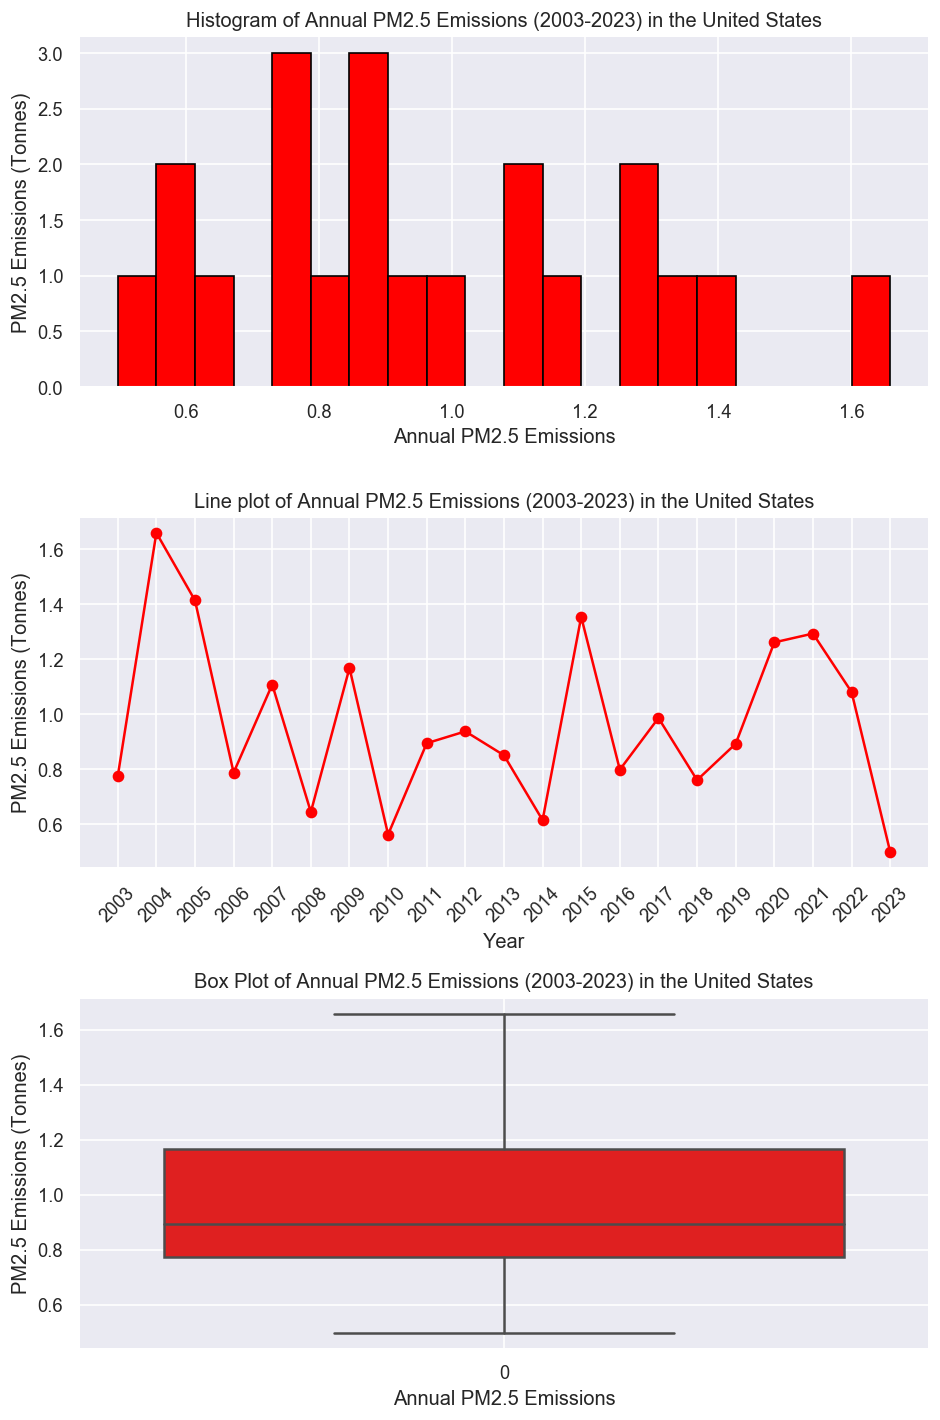

In [383]:
# Convert years and emissions to numpy arrays
years = np.array(PM25Emissions_2003To2023_USA['Year'])
emissions = np.array(PM25Emissions_2003To2023_USA['Annual PM2.5 emissions from wildfires'])

# Create figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Plotting histogram
ax1.hist(emissions, bins=20, color='red', edgecolor='black')
ax1.set_title('Histogram of Annual PM2.5 Emissions (2003-2023) in the United States')
ax1.set_xlabel('Annual PM2.5 Emissions')
ax1.set_ylabel('PM2.5 Emissions (Tonnes)')
ax1.grid(True)

# Plotting line plot
ax2.plot(years, emissions, marker='o', linestyle='-', color='red')
ax2.set_title('Line plot of Annual PM2.5 Emissions (2003-2023) in the United States')
ax2.set_xlabel('Year')
ax2.set_ylabel('PM2.5 Emissions (Tonnes)')
ax2.grid(True)
ax2.set_xticks(years)
ax2.set_xticklabels(years, rotation=45)

# Adding box plot for PM2.5 emissions
sns.boxplot(data=emissions, ax=ax3, color='red')
ax3.set_title('Box Plot of Annual PM2.5 Emissions (2003-2023) in the United States')
ax3.set_xlabel('Annual PM2.5 Emissions')
ax3.set_ylabel('PM2.5 Emissions (Tonnes)')
ax3.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


#### Area Burnt

In [384]:
fliterCountry = 'United States'  # Replace 'United States' with the Country you want to filter by.
AreaBurnt_2003To2024_USA = AreaBurntAnnually_AllCountries_2012To2024_data[AreaBurntAnnually_AllCountries_2012To2024_data['Entity'] == fliterCountry]
print(AreaBurnt_2003To2024_USA)

             Entity Code  Year  Annual_Area_Burnt_per_Wildfire
2258  United States  USA  2012                        0.025085
2259  United States  USA  2013                        0.021281
2260  United States  USA  2014                        0.020248
2261  United States  USA  2015                        0.022620
2262  United States  USA  2016                        0.020681
2263  United States  USA  2017                        0.025698
2264  United States  USA  2018                        0.022928
2265  United States  USA  2019                        0.018631
2266  United States  USA  2020                        0.028544
2267  United States  USA  2021                        0.031827
2268  United States  USA  2022                        0.024554
2269  United States  USA  2023                        0.014462
2270  United States  USA  2024                        0.004382


In [385]:
# Display summary of each dataframe
print("Summary of Area Burnt Annually:")
print(AreaBurnt_2003To2024_USA.info())

# Removing year 2024 data because it is not for complete year.
AreaBurnt_2003To2023_USA = AreaBurnt_2003To2024_USA[:-1]

# Area Burnt Annually
print("\nSummary statistics and shape of Area Burnt Annually:")
print(AreaBurnt_2003To2023_USA['Annual_Area_Burnt_per_Wildfire'].describe())
print("\n\nShape of Area Burnt Annually:", AreaBurnt_2003To2023_USA.shape)

Summary of Area Burnt Annually:
<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 2258 to 2270
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          13 non-null     object 
 1   Code                            13 non-null     object 
 2   Year                            13 non-null     int64  
 3   Annual_Area_Burnt_per_Wildfire  13 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 520.0+ bytes
None

Summary statistics and shape of Area Burnt Annually:
count    12.000000
mean      0.023047
std       0.004580
min       0.014462
25%       0.020573
50%       0.022774
75%       0.025239
max       0.031827
Name: Annual_Area_Burnt_per_Wildfire, dtype: float64


Shape of Area Burnt Annually: (12, 4)


In [386]:
# Calculate percentage change between consecutive years
AreaBurnt_2003To2023_USA['Percentage_Change'] = AreaBurnt_2003To2023_USA['Annual_Area_Burnt_per_Wildfire'].pct_change() * 100

# Print the DataFrame with percentage change
print(AreaBurnt_2003To2023_USA)

             Entity Code  Year  Annual_Area_Burnt_per_Wildfire  \
2258  United States  USA  2012                        0.025085   
2259  United States  USA  2013                        0.021281   
2260  United States  USA  2014                        0.020248   
2261  United States  USA  2015                        0.022620   
2262  United States  USA  2016                        0.020681   
2263  United States  USA  2017                        0.025698   
2264  United States  USA  2018                        0.022928   
2265  United States  USA  2019                        0.018631   
2266  United States  USA  2020                        0.028544   
2267  United States  USA  2021                        0.031827   
2268  United States  USA  2022                        0.024554   
2269  United States  USA  2023                        0.014462   

      Percentage_Change  
2258                NaN  
2259         -15.166676  
2260          -4.853690  
2261          11.716782  
2262       

/var/folders/lz/06glpb2526qgqhtf0pvflrz80000gn/T/ipykernel_83811/1766531763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AreaBurnt_2003To2023_USA['Percentage_Change'] = AreaBurnt_2003To2023_USA['Annual_Area_Burnt_per_Wildfire'].pct_change() * 100


### Area Burnt
### Plotting Stuff

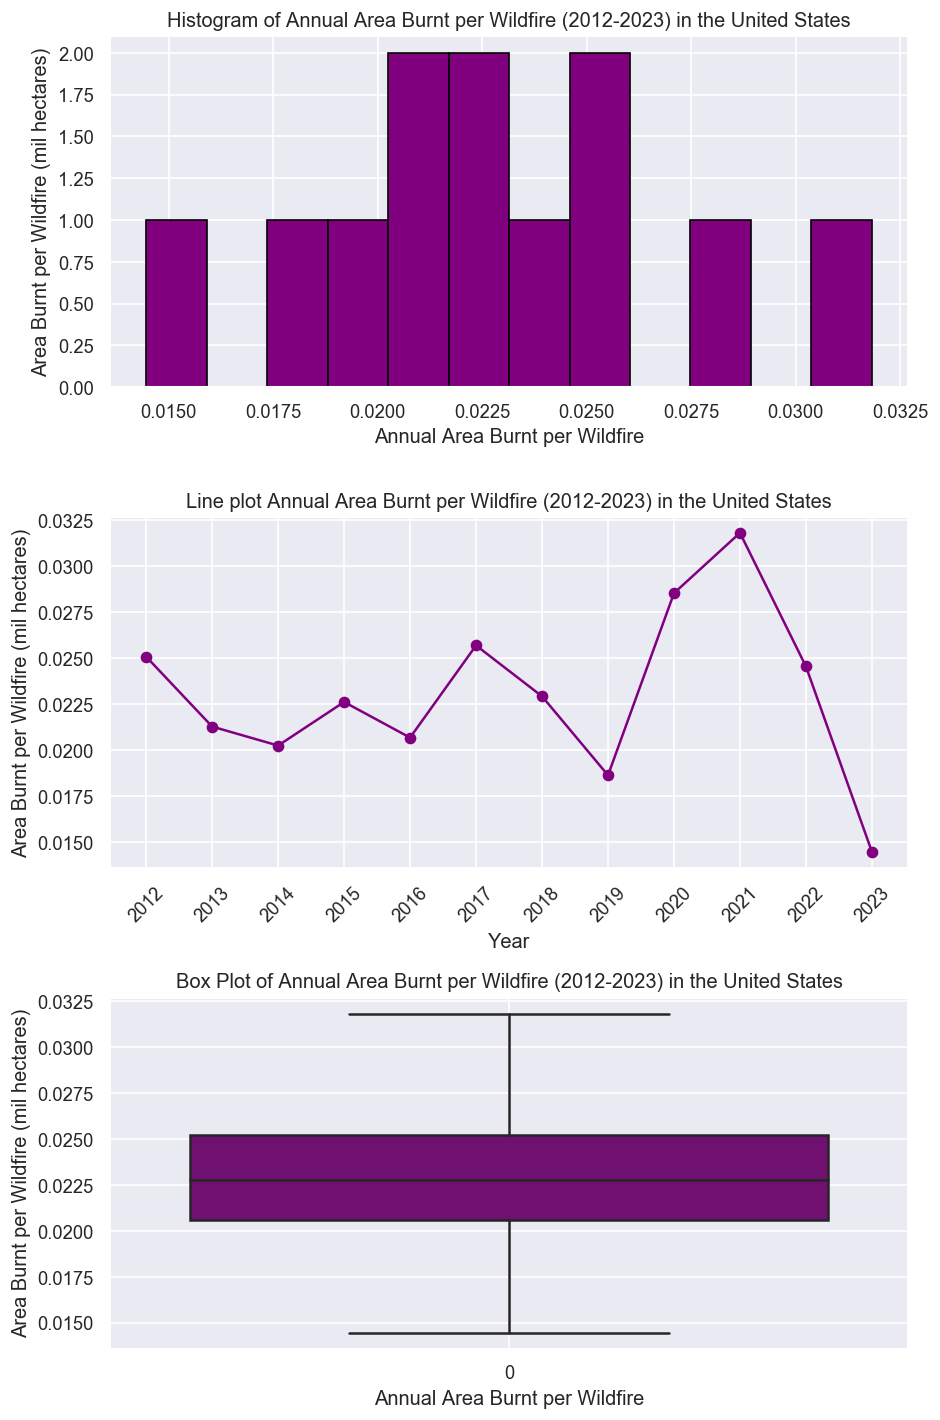

In [387]:
# Convert years and emissions to numpy arrays
years = np.array(AreaBurnt_2003To2023_USA['Year'])
emissions = np.array(AreaBurnt_2003To2023_USA['Annual_Area_Burnt_per_Wildfire'])

# Create figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Plotting histogram
ax1.hist(emissions, bins=12, color='purple', edgecolor='black')
ax1.set_title('Histogram of Annual Area Burnt per Wildfire (2012-2023) in the United States')
ax1.set_xlabel('Annual Area Burnt per Wildfire')
ax1.set_ylabel('Area Burnt per Wildfire (mil hectares)')
ax1.grid(True)

# Plotting line plot
ax2.plot(years, emissions, marker='o', linestyle='-', color='purple')
ax2.set_title('Line plot Annual Area Burnt per Wildfire (2012-2023) in the United States')
ax2.set_xlabel('Year')
ax2.set_ylabel('Area Burnt per Wildfire (mil hectares)')
ax2.grid(True)
ax2.set_xticks(years)
ax2.set_xticklabels(years, rotation=45)

# Adding box plot for Area Burnt per Wildfire
sns.boxplot(data=emissions, ax=ax3, color='purple')
ax3.set_title('Box Plot of Annual Area Burnt per Wildfire (2012-2023) in the United States')
ax3.set_xlabel('Annual Area Burnt per Wildfire')
ax3.set_ylabel('Area Burnt per Wildfire (mil hectares)')
ax3.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### Flitering DF for India Specific Data.

#### CO2 Emissions

In [388]:
fliterCountry = 'India'  # Replace 'India' with the Country you want to filter by.
CO2Emmissions_2003To2024_IND = CO2EmmissionsAnnually_AllCountries_2003To2024_data[CO2EmmissionsAnnually_AllCountries_2003To2024_data['Entity'] == fliterCountry]
print(CO2Emmissions_2003To2024_IND)

     Entity Code  Year  Annual_carbon_dioxide_emissions
2354  India  IND  2003                        79.619300
2355  India  IND  2004                        83.115340
2356  India  IND  2005                        80.994260
2357  India  IND  2006                        83.202216
2358  India  IND  2007                        72.944420
2359  India  IND  2008                        63.249172
2360  India  IND  2009                        88.624190
2361  India  IND  2010                        72.259540
2362  India  IND  2011                        60.604588
2363  India  IND  2012                        73.798616
2364  India  IND  2013                        57.648076
2365  India  IND  2014                        64.428360
2366  India  IND  2015                        63.010204
2367  India  IND  2016                        96.181784
2368  India  IND  2017                        51.851268
2369  India  IND  2018                        56.284668
2370  India  IND  2019                        52

In [389]:
# Display summary of each dataframe
print("Summary of CO2 Emissions Annually:")
print(CO2Emmissions_2003To2024_IND.info())

# Removing year 2024 data because it is not for complete year.
CO2Emmissions_2003To2023_IND =CO2Emmissions_2003To2024_IND[:-1]

# CO2 Emissions Annually
print("\n\nSummary statistics and shape of CO2 Emissions Annually:")
print(CO2Emmissions_2003To2023_IND['Annual_carbon_dioxide_emissions'].describe())
print("\n\nShape of CO2 Emissions Annually:", CO2Emmissions_2003To2023_IND.shape)

Summary of CO2 Emissions Annually:
<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 2354 to 2375
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           22 non-null     object 
 1   Code                             22 non-null     object 
 2   Year                             22 non-null     int64  
 3   Annual_carbon_dioxide_emissions  22 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 880.0+ bytes
None


Summary statistics and shape of CO2 Emissions Annually:
count    21.000000
mean     67.597830
std      14.598296
min      45.254812
25%      56.284668
50%      64.428360
75%      79.619300
max      96.181784
Name: Annual_carbon_dioxide_emissions, dtype: float64


Shape of CO2 Emissions Annually: (21, 4)


In [390]:
# Calculate percentage change between consecutive years
CO2Emmissions_2003To2023_IND['Percentage_Change'] = CO2Emmissions_2003To2023_IND['Annual_carbon_dioxide_emissions'].pct_change() * 100

# Print the DataFrame with percentage change
print(CO2Emmissions_2003To2023_IND)

     Entity Code  Year  Annual_carbon_dioxide_emissions  Percentage_Change
2354  India  IND  2003                        79.619300                NaN
2355  India  IND  2004                        83.115340           4.390945
2356  India  IND  2005                        80.994260          -2.551972
2357  India  IND  2006                        83.202216           2.726065
2358  India  IND  2007                        72.944420         -12.328753
2359  India  IND  2008                        63.249172         -13.291281
2360  India  IND  2009                        88.624190          40.119131
2361  India  IND  2010                        72.259540         -18.465218
2362  India  IND  2011                        60.604588         -16.129292
2363  India  IND  2012                        73.798616          21.770675
2364  India  IND  2013                        57.648076         -21.884611
2365  India  IND  2014                        64.428360          11.761510
2366  India  IND  2015   

/var/folders/lz/06glpb2526qgqhtf0pvflrz80000gn/T/ipykernel_83811/674093629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CO2Emmissions_2003To2023_IND['Percentage_Change'] = CO2Emmissions_2003To2023_IND['Annual_carbon_dioxide_emissions'].pct_change() * 100


### CO2 Emissions
### Plotting Stuff

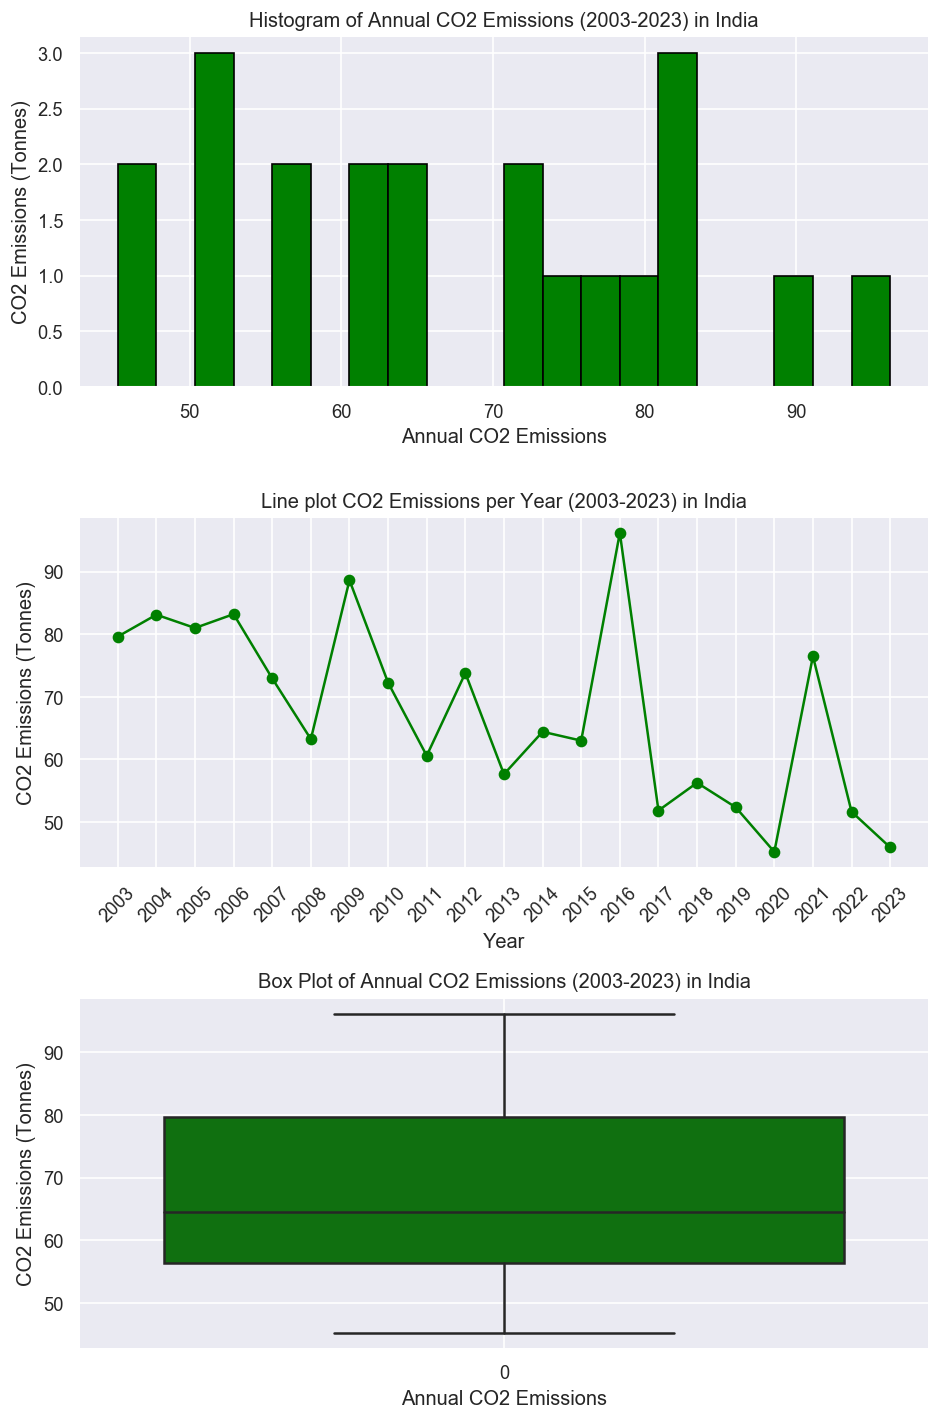

In [391]:
# Convert years and emissions to numpy arrays
years = np.array(CO2Emmissions_2003To2023_IND['Year'])
emissions = np.array(CO2Emmissions_2003To2023_IND['Annual_carbon_dioxide_emissions'])

# Create figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Plotting histogram
ax1.hist(emissions, bins=20, color='green', edgecolor='black')
ax1.set_title('Histogram of Annual CO2 Emissions (2003-2023) in India')
ax1.set_xlabel('Annual CO2 Emissions')
ax1.set_ylabel('CO2 Emissions (Tonnes)')
ax1.grid(True)

# Plotting line plot
ax2.plot(years, emissions, marker='o', linestyle='-', color='green')
ax2.set_title('Line plot CO2 Emissions per Year (2003-2023) in India')
ax2.set_xlabel('Year')
ax2.set_ylabel('CO2 Emissions (Tonnes)')
ax2.grid(True)
ax2.set_xticks(years)
ax2.set_xticklabels(years, rotation=45)

# Adding box plot for CO2 emissions
sns.boxplot(data=emissions, ax=ax3, color='green')
ax3.set_title('Box Plot of Annual CO2 Emissions (2003-2023) in India')
ax3.set_xlabel('Annual CO2 Emissions')
ax3.set_ylabel('CO2 Emissions (Tonnes)')
ax3.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### PM2.5 Emissions

In [392]:
fliterCountry = 'India'  # Replace 'India' with the Country you want to filter by.
PM25Emissions_2003To2024_IND = PM25EmissionsAnnually_AllCountries_2003To2024_data[PM25EmissionsAnnually_AllCountries_2003To2024_data['Entity'] == fliterCountry]
print(PM25Emissions_2003To2024_IND)

     Entity Code  Year  Annual PM2.5 emissions from wildfires
2354  India  IND  2003                               0.449925
2355  India  IND  2004                               0.468289
2356  India  IND  2005                               0.444698
2357  India  IND  2006                               0.465842
2358  India  IND  2007                               0.403110
2359  India  IND  2008                               0.348455
2360  India  IND  2009                               0.482061
2361  India  IND  2010                               0.401530
2362  India  IND  2011                               0.331125
2363  India  IND  2012                               0.411588
2364  India  IND  2013                               0.318751
2365  India  IND  2014                               0.358630
2366  India  IND  2015                               0.348489
2367  India  IND  2016                               0.529633
2368  India  IND  2017                               0.278906
2369  In

In [393]:
# Display summary of each dataframe
print("Summary of PM25 Emissions Annually:")
print(PM25Emissions_2003To2024_IND.info())

# Removing year 2024 data because it is not for complete year.
PM25Emissions_2003To2023_IND = PM25Emissions_2003To2024_IND[:-1]

# PM25 Emissions Annually
print("\nSummary statistics and shape of PM25 Emissions Annually:")
print(PM25Emissions_2003To2023_IND['Annual PM2.5 emissions from wildfires'].describe())
print("\n\nShape of PM25 Emissions Annually:", PM25Emissions_2003To2023_IND.shape)

Summary of PM25 Emissions Annually:
<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 2354 to 2375
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Entity                                 22 non-null     object 
 1   Code                                   22 non-null     object 
 2   Year                                   22 non-null     int64  
 3   Annual PM2.5 emissions from wildfires  22 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 880.0+ bytes
None

Summary statistics and shape of PM25 Emissions Annually:
count    21.000000
mean      0.372197
std       0.083128
min       0.244653
25%       0.301148
50%       0.358630
75%       0.444698
max       0.529633
Name: Annual PM2.5 emissions from wildfires, dtype: float64


Shape of PM25 Emissions Annually: (21, 4)


In [394]:
# Calculate percentage change between consecutive years
PM25Emissions_2003To2023_IND['Percentage_Change'] = PM25Emissions_2003To2023_IND['Annual PM2.5 emissions from wildfires'].pct_change() * 100

# Print the DataFrame with percentage change
print(PM25Emissions_2003To2023_IND)

     Entity Code  Year  Annual PM2.5 emissions from wildfires  \
2354  India  IND  2003                               0.449925   
2355  India  IND  2004                               0.468289   
2356  India  IND  2005                               0.444698   
2357  India  IND  2006                               0.465842   
2358  India  IND  2007                               0.403110   
2359  India  IND  2008                               0.348455   
2360  India  IND  2009                               0.482061   
2361  India  IND  2010                               0.401530   
2362  India  IND  2011                               0.331125   
2363  India  IND  2012                               0.411588   
2364  India  IND  2013                               0.318751   
2365  India  IND  2014                               0.358630   
2366  India  IND  2015                               0.348489   
2367  India  IND  2016                               0.529633   
2368  India  IND  2017   

/var/folders/lz/06glpb2526qgqhtf0pvflrz80000gn/T/ipykernel_83811/4112890939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25Emissions_2003To2023_IND['Percentage_Change'] = PM25Emissions_2003To2023_IND['Annual PM2.5 emissions from wildfires'].pct_change() * 100


### PM2.5 Emissions
### Plotting Stuff

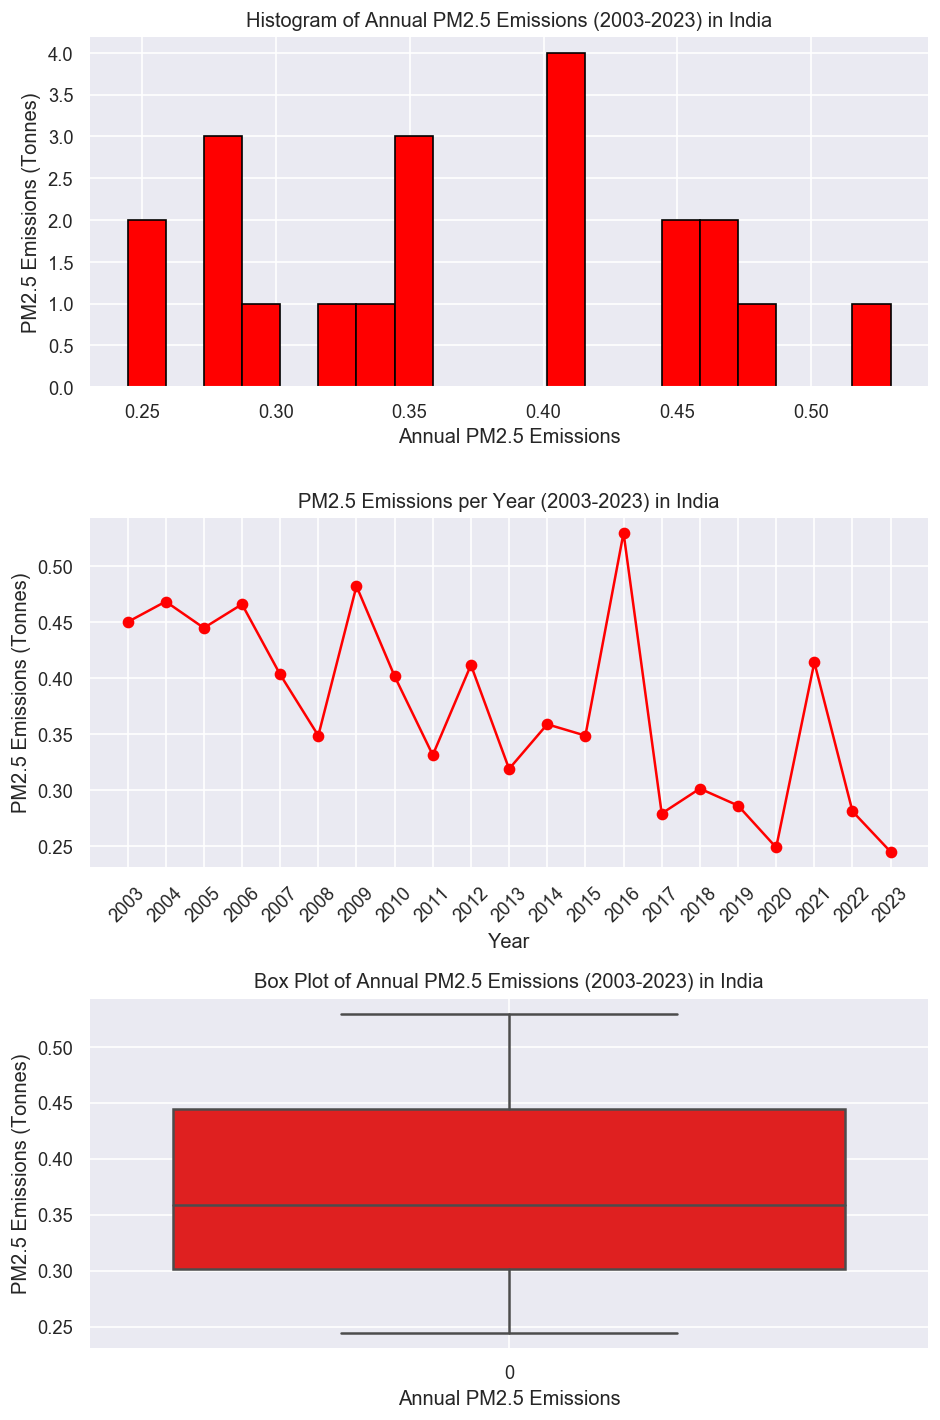

In [395]:
# Convert years and emissions to numpy arrays
years = np.array(PM25Emissions_2003To2023_IND['Year'])
emissions = np.array(PM25Emissions_2003To2023_IND['Annual PM2.5 emissions from wildfires'])

# Create figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Plotting histogram
ax1.hist(emissions, bins=20, color='red', edgecolor='black')
ax1.set_title('Histogram of Annual PM2.5 Emissions (2003-2023) in India')
ax1.set_xlabel('Annual PM2.5 Emissions')
ax1.set_ylabel('PM2.5 Emissions (Tonnes)')
ax1.grid(True)

# Plotting line plot
ax2.plot(years, emissions, marker='o', linestyle='-', color='red')
ax2.set_title('PM2.5 Emissions per Year (2003-2023) in India')
ax2.set_xlabel('Year')
ax2.set_ylabel('PM2.5 Emissions (Tonnes)')
ax2.grid(True)
ax2.set_xticks(years)
ax2.set_xticklabels(years, rotation=45)

# Adding box plot for PM2.5 emissions
sns.boxplot(data=emissions, ax=ax3, color='red')
ax3.set_title('Box Plot of Annual PM2.5 Emissions (2003-2023) in India')
ax3.set_xlabel('Annual PM2.5 Emissions')
ax3.set_ylabel('PM2.5 Emissions (Tonnes)')
ax3.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### Area Burnt

In [396]:
fliterCountry = 'India'  # Replace 'India' with the Country you want to filter by.
AreaBurnt_2003To2024_IND = AreaBurntAnnually_AllCountries_2012To2024_data[AreaBurntAnnually_AllCountries_2012To2024_data['Entity'] == fliterCountry]
print(AreaBurnt_2003To2024_IND)

     Entity Code  Year  Annual_Area_Burnt_per_Wildfire
1010  India  IND  2012                        0.015021
1011  India  IND  2013                        0.013669
1012  India  IND  2014                        0.014070
1013  India  IND  2015                        0.014056
1014  India  IND  2016                        0.014875
1015  India  IND  2017                        0.013936
1016  India  IND  2018                        0.012668
1017  India  IND  2019                        0.014449
1018  India  IND  2020                        0.013990
1019  India  IND  2021                        0.014373
1020  India  IND  2022                        0.014073
1021  India  IND  2023                        0.014188
1022  India  IND  2024                        0.004627


In [397]:
# Display summary of each dataframe
print("Summary of Area Burnt Annually:")
print(AreaBurnt_2003To2024_IND.info())

# Removing year 2024 data because it is not for complete year.
AreaBurnt_2003To2023_IND = AreaBurnt_2003To2024_IND[:-1]

# Area Burnt Annually
print("\nSummary statistics and shape of Area Burnt Annually:")
print(AreaBurnt_2003To2023_IND['Annual_Area_Burnt_per_Wildfire'].describe())
print("\n\nShape of Area Burnt Annually:", AreaBurnt_2003To2023_IND.shape)

Summary of Area Burnt Annually:
<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 1010 to 1022
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          13 non-null     object 
 1   Code                            13 non-null     object 
 2   Year                            13 non-null     int64  
 3   Annual_Area_Burnt_per_Wildfire  13 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 520.0+ bytes
None

Summary statistics and shape of Area Burnt Annually:
count    12.000000
mean      0.014114
std       0.000598
min       0.012668
25%       0.013977
50%       0.014072
75%       0.014392
max       0.015021
Name: Annual_Area_Burnt_per_Wildfire, dtype: float64


Shape of Area Burnt Annually: (12, 4)


In [398]:
# Calculate percentage change between consecutive years
AreaBurnt_2003To2023_IND['Percentage_Change'] = AreaBurnt_2003To2023_IND['Annual_Area_Burnt_per_Wildfire'].pct_change() * 100

# Print the DataFrame with percentage change
print(AreaBurnt_2003To2023_IND)

     Entity Code  Year  Annual_Area_Burnt_per_Wildfire  Percentage_Change
1010  India  IND  2012                        0.015021                NaN
1011  India  IND  2013                        0.013669          -9.001167
1012  India  IND  2014                        0.014070           2.931934
1013  India  IND  2015                        0.014056          -0.098067
1014  India  IND  2016                        0.014875           5.829274
1015  India  IND  2017                        0.013936          -6.317139
1016  India  IND  2018                        0.012668          -9.095346
1017  India  IND  2019                        0.014449          14.058564
1018  India  IND  2020                        0.013990          -3.176769
1019  India  IND  2021                        0.014373           2.736454
1020  India  IND  2022                        0.014073          -2.086285
1021  India  IND  2023                        0.014188           0.814861


/var/folders/lz/06glpb2526qgqhtf0pvflrz80000gn/T/ipykernel_83811/3549738947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AreaBurnt_2003To2023_IND['Percentage_Change'] = AreaBurnt_2003To2023_IND['Annual_Area_Burnt_per_Wildfire'].pct_change() * 100


### Area Burnt
### Plotting Stuff

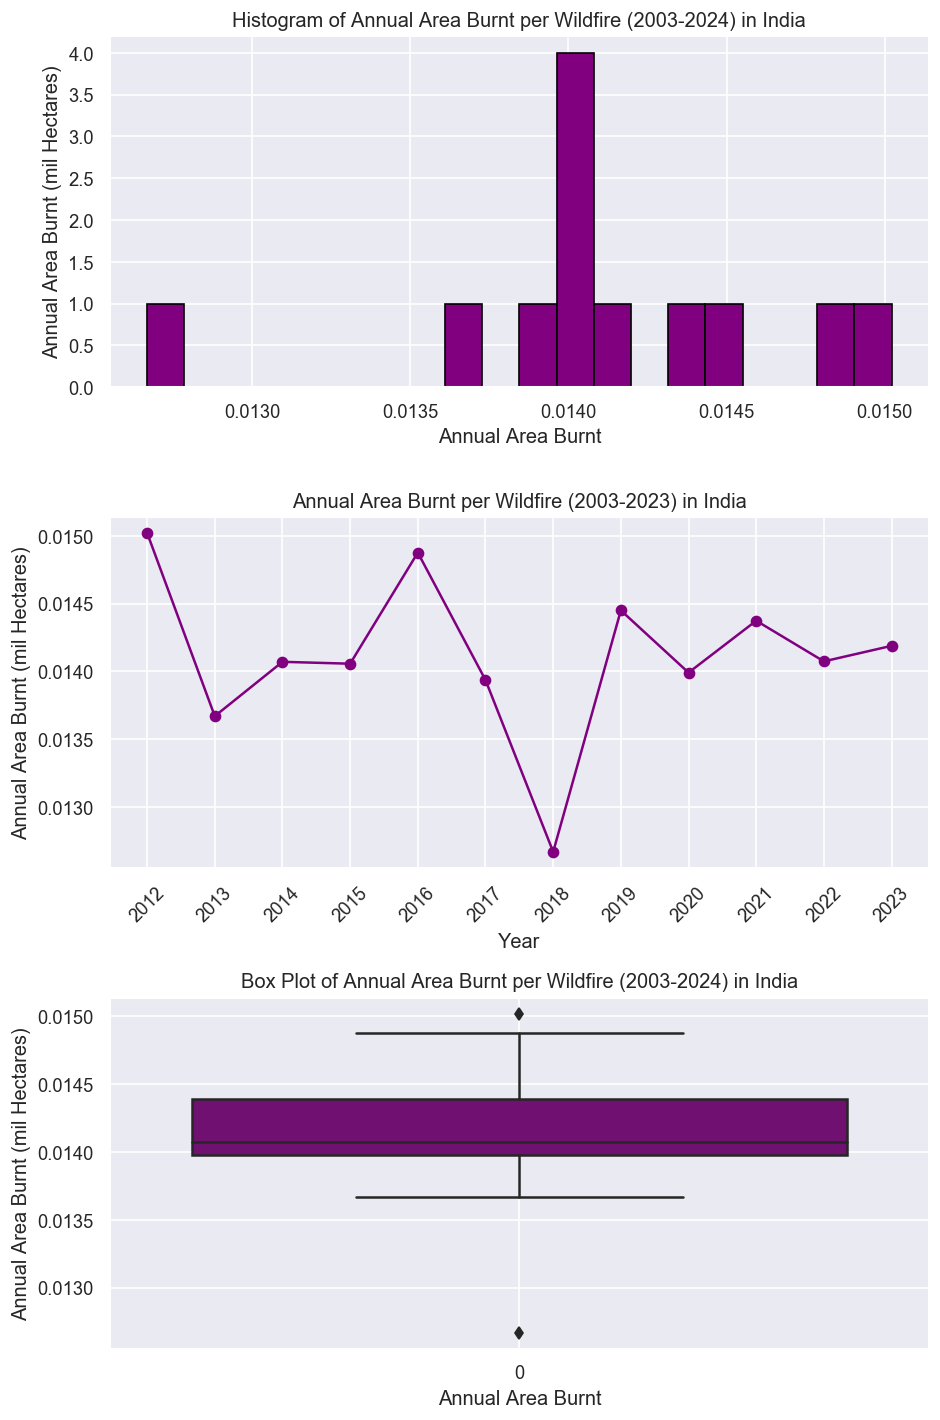

In [399]:
# Convert years and emissions to numpy arrays
years = np.array(AreaBurnt_2003To2023_IND['Year'])
emissions = np.array(AreaBurnt_2003To2023_IND['Annual_Area_Burnt_per_Wildfire'])

# Create figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Plotting histogram
ax1.hist(emissions, bins=20, color='purple', edgecolor='black')
ax1.set_title('Histogram of Annual Area Burnt per Wildfire (2003-2024) in India')
ax1.set_xlabel('Annual Area Burnt')
ax1.set_ylabel('Annual Area Burnt (mil Hectares)')
ax1.grid(True)

# Plotting line plot
ax2.plot(years, emissions, marker='o', linestyle='-', color='purple')
ax2.set_title('Annual Area Burnt per Wildfire (2003-2023) in India')
ax2.set_xlabel('Year')
ax2.set_ylabel('Annual Area Burnt (mil Hectares)')
ax2.grid(True)
ax2.set_xticks(years)
ax2.set_xticklabels(years, rotation=45)

# Adding box plot for annual area burnt
sns.boxplot(data=emissions, ax=ax3, color='purple')
ax3.set_title('Box Plot of Annual Area Burnt per Wildfire (2003-2024) in India')
ax3.set_xlabel('Annual Area Burnt')
ax3.set_ylabel('Annual Area Burnt (mil Hectares)')
ax3.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### Flitering DF for World Specific Data.

#### CO2 Emissions

In [400]:
fliterCountry = 'World'  # Replace 'World' with the Country you want to filter by.
CO2Emmissions_2003To2024_OWID_WRL = CO2EmmissionsAnnually_AllCountries_2003To2024_data[CO2EmmissionsAnnually_AllCountries_2003To2024_data['Entity'] == fliterCountry]
print(CO2Emmissions_2003To2024_OWID_WRL)

     Entity      Code  Year  Annual_carbon_dioxide_emissions
5588  World  OWID_WRL  2003                        7812.2225
5589  World  OWID_WRL  2004                        7365.7320
5590  World  OWID_WRL  2005                        7147.4230
5591  World  OWID_WRL  2006                        6868.2276
5592  World  OWID_WRL  2007                        7278.8157
5593  World  OWID_WRL  2008                        6534.7610
5594  World  OWID_WRL  2009                        6088.8950
5595  World  OWID_WRL  2010                        6395.3560
5596  World  OWID_WRL  2011                        6761.3076
5597  World  OWID_WRL  2012                        7391.1516
5598  World  OWID_WRL  2013                        5780.1600
5599  World  OWID_WRL  2014                        6429.1973
5600  World  OWID_WRL  2015                        7219.8330
5601  World  OWID_WRL  2016                        6318.4850
5602  World  OWID_WRL  2017                        5646.9683
5603  World  OWID_WRL  2

In [401]:
# Display summary of each dataframe
print("Summary of CO2 Emissions Annually:")
print(CO2Emmissions_2003To2024_OWID_WRL.info())

# Removing year 2024 data because it is not for complete year.
CO2Emmissions_2003To2023_OWID_WRL = CO2Emmissions_2003To2024_OWID_WRL[:-1]

# CO2 Emissions Annually
print("\n\nSummary statistics and shape of CO2 Emissions Annually:")
print(CO2Emmissions_2003To2023_OWID_WRL['Annual_carbon_dioxide_emissions'].describe())
print("\n\nShape of CO2 Emissions Annually:", CO2Emmissions_2003To2023_OWID_WRL.shape)

Summary of CO2 Emissions Annually:
<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 5588 to 5609
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           22 non-null     object 
 1   Code                             22 non-null     object 
 2   Year                             22 non-null     int64  
 3   Annual_carbon_dioxide_emissions  22 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 880.0+ bytes
None


Summary statistics and shape of CO2 Emissions Annually:
count      21.000000
mean     6440.976162
std       790.200059
min      4856.387600
25%      5893.582300
50%      6429.197300
75%      7147.423000
max      7812.222500
Name: Annual_carbon_dioxide_emissions, dtype: float64


Shape of CO2 Emissions Annually: (21, 4)


In [402]:
# Calculate percentage change between consecutive years
CO2Emmissions_2003To2023_OWID_WRL['Percentage_Change'] = CO2Emmissions_2003To2023_OWID_WRL['Annual_carbon_dioxide_emissions'].pct_change() * 100

# Print the DataFrame with percentage change
print(CO2Emmissions_2003To2023_OWID_WRL)

     Entity      Code  Year  Annual_carbon_dioxide_emissions  \
5588  World  OWID_WRL  2003                        7812.2225   
5589  World  OWID_WRL  2004                        7365.7320   
5590  World  OWID_WRL  2005                        7147.4230   
5591  World  OWID_WRL  2006                        6868.2276   
5592  World  OWID_WRL  2007                        7278.8157   
5593  World  OWID_WRL  2008                        6534.7610   
5594  World  OWID_WRL  2009                        6088.8950   
5595  World  OWID_WRL  2010                        6395.3560   
5596  World  OWID_WRL  2011                        6761.3076   
5597  World  OWID_WRL  2012                        7391.1516   
5598  World  OWID_WRL  2013                        5780.1600   
5599  World  OWID_WRL  2014                        6429.1973   
5600  World  OWID_WRL  2015                        7219.8330   
5601  World  OWID_WRL  2016                        6318.4850   
5602  World  OWID_WRL  2017             

/var/folders/lz/06glpb2526qgqhtf0pvflrz80000gn/T/ipykernel_83811/3581526526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CO2Emmissions_2003To2023_OWID_WRL['Percentage_Change'] = CO2Emmissions_2003To2023_OWID_WRL['Annual_carbon_dioxide_emissions'].pct_change() * 100


### CO2 Emissions
### Plotting Stuff

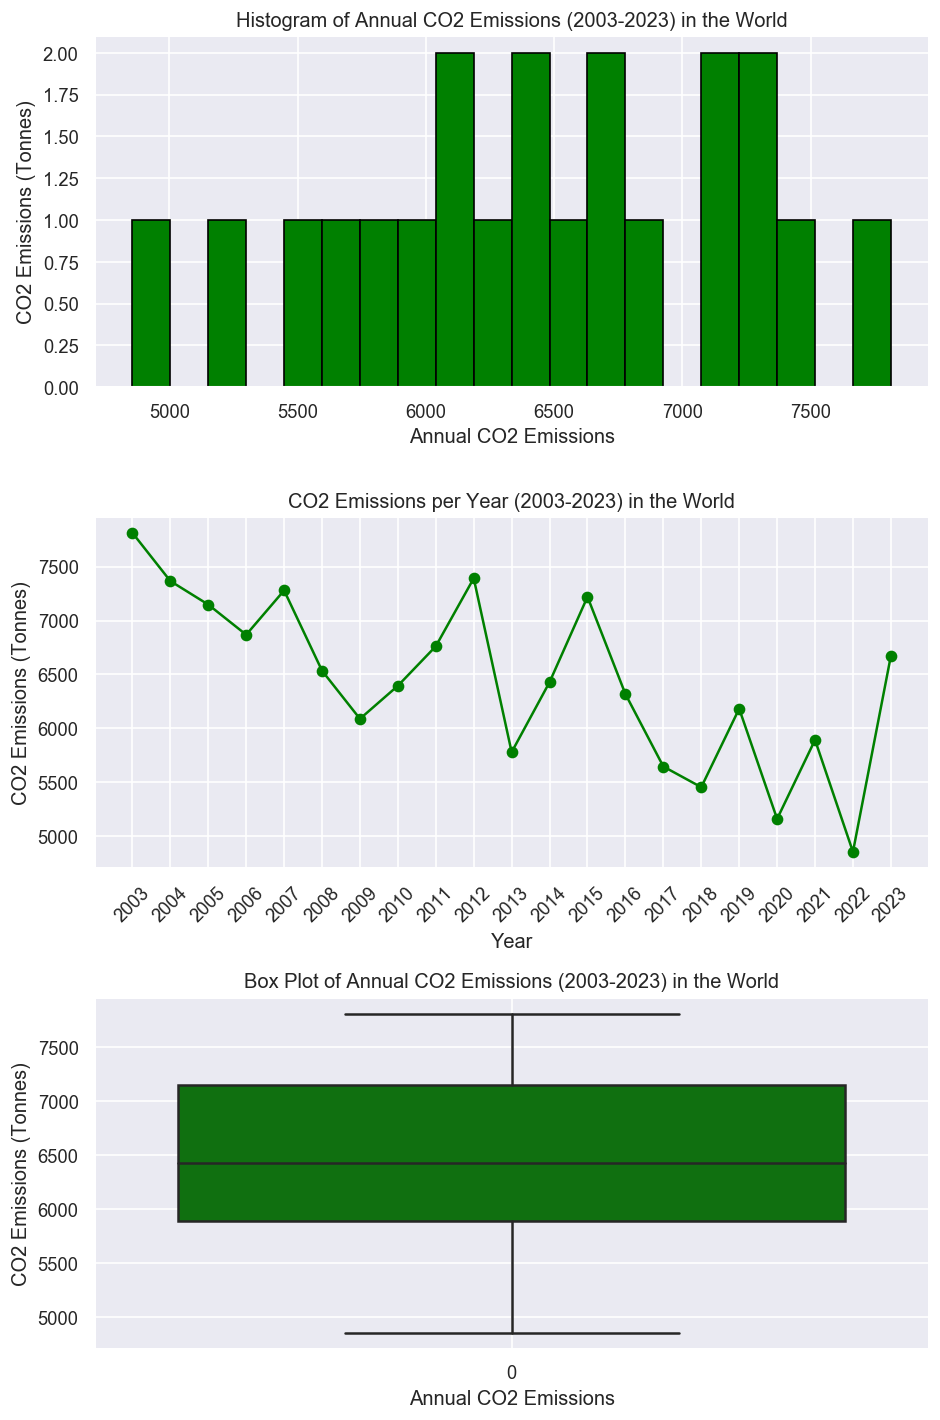

In [403]:
# Convert years and emissions to numpy arrays
years = np.array(CO2Emmissions_2003To2023_OWID_WRL['Year'])
emissions = np.array(CO2Emmissions_2003To2023_OWID_WRL['Annual_carbon_dioxide_emissions'])

# Create figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Plotting histogram
ax1.hist(emissions, bins=20, color='green', edgecolor='black')
ax1.set_title('Histogram of Annual CO2 Emissions (2003-2023) in the World')
ax1.set_xlabel('Annual CO2 Emissions')
ax1.set_ylabel('CO2 Emissions (Tonnes)')
ax1.grid(True)

# Plotting line plot
ax2.plot(years, emissions, marker='o', linestyle='-', color='green')
ax2.set_title('CO2 Emissions per Year (2003-2023) in the World')
ax2.set_xlabel('Year')
ax2.set_ylabel('CO2 Emissions (Tonnes)')
ax2.grid(True)
ax2.set_xticks(years)
ax2.set_xticklabels(years, rotation=45)

# Adding box plot for CO2 emissions
sns.boxplot(data=emissions, ax=ax3, color='green')
ax3.set_title('Box Plot of Annual CO2 Emissions (2003-2023) in the World')
ax3.set_xlabel('Annual CO2 Emissions')
ax3.set_ylabel('CO2 Emissions (Tonnes)')
ax3.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### PM2.5 Emissions

In [404]:
fliterCountry = 'World'  # Replace 'World' with the Country you want to filter by.
PM25Emissions_2003To2024_OWID_WRL = PM25EmissionsAnnually_AllCountries_2003To2024_data[PM25EmissionsAnnually_AllCountries_2003To2024_data['Entity'] == fliterCountry]
print(PM25Emissions_2003To2024_OWID_WRL)

     Entity      Code  Year  Annual PM2.5 emissions from wildfires
5588  World  OWID_WRL  2003                              36.573976
5589  World  OWID_WRL  2004                              31.335194
5590  World  OWID_WRL  2005                              30.569386
5591  World  OWID_WRL  2006                              29.467762
5592  World  OWID_WRL  2007                              30.385412
5593  World  OWID_WRL  2008                              28.017734
5594  World  OWID_WRL  2009                              25.458000
5595  World  OWID_WRL  2010                              26.923142
5596  World  OWID_WRL  2011                              27.413200
5597  World  OWID_WRL  2012                              32.000924
5598  World  OWID_WRL  2013                              24.859944
5599  World  OWID_WRL  2014                              28.485720
5600  World  OWID_WRL  2015                              32.485882
5601  World  OWID_WRL  2016                              27.20

In [405]:
# Display summary of each dataframe
print("Summary of PM25 Emissions Annually:")
print(PM25Emissions_2003To2024_OWID_WRL.info())

# Removing year 2024 data because it is not for complete year.
PM25Emissions_2003To2023_OWID_WRL = PM25Emissions_2003To2024_OWID_WRL[:-1]

# PM25 Emissions Annually
print("\nSummary statistics and shape of PM25 Emissions Annually:")
print(PM25Emissions_2003To2023_OWID_WRL['Annual PM2.5 emissions from wildfires'].describe())
print("\n\nShape of PM25 Emissions Annually:", PM25Emissions_2003To2023_OWID_WRL.shape)

Summary of PM25 Emissions Annually:
<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 5588 to 5609
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Entity                                 22 non-null     object 
 1   Code                                   22 non-null     object 
 2   Year                                   22 non-null     int64  
 3   Annual PM2.5 emissions from wildfires  22 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 880.0+ bytes
None

Summary statistics and shape of PM25 Emissions Annually:
count    21.000000
mean     28.042009
std       3.870507
min      20.312744
25%      25.458000
50%      27.625462
75%      30.569386
max      36.573976
Name: Annual PM2.5 emissions from wildfires, dtype: float64


Shape of PM25 Emissions Annually: (21, 4)


In [406]:
# Calculate percentage change between consecutive years
PM25Emissions_2003To2023_OWID_WRL['Percentage_Change'] = PM25Emissions_2003To2023_OWID_WRL['Annual PM2.5 emissions from wildfires'].pct_change() * 100

# Print the DataFrame with percentage change
print(PM25Emissions_2003To2023_OWID_WRL)

     Entity      Code  Year  Annual PM2.5 emissions from wildfires  \
5588  World  OWID_WRL  2003                              36.573976   
5589  World  OWID_WRL  2004                              31.335194   
5590  World  OWID_WRL  2005                              30.569386   
5591  World  OWID_WRL  2006                              29.467762   
5592  World  OWID_WRL  2007                              30.385412   
5593  World  OWID_WRL  2008                              28.017734   
5594  World  OWID_WRL  2009                              25.458000   
5595  World  OWID_WRL  2010                              26.923142   
5596  World  OWID_WRL  2011                              27.413200   
5597  World  OWID_WRL  2012                              32.000924   
5598  World  OWID_WRL  2013                              24.859944   
5599  World  OWID_WRL  2014                              28.485720   
5600  World  OWID_WRL  2015                              32.485882   
5601  World  OWID_WR

/var/folders/lz/06glpb2526qgqhtf0pvflrz80000gn/T/ipykernel_83811/3553666473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PM25Emissions_2003To2023_OWID_WRL['Percentage_Change'] = PM25Emissions_2003To2023_OWID_WRL['Annual PM2.5 emissions from wildfires'].pct_change() * 100


### PM2.5 Emissions
### Plotting Stuff

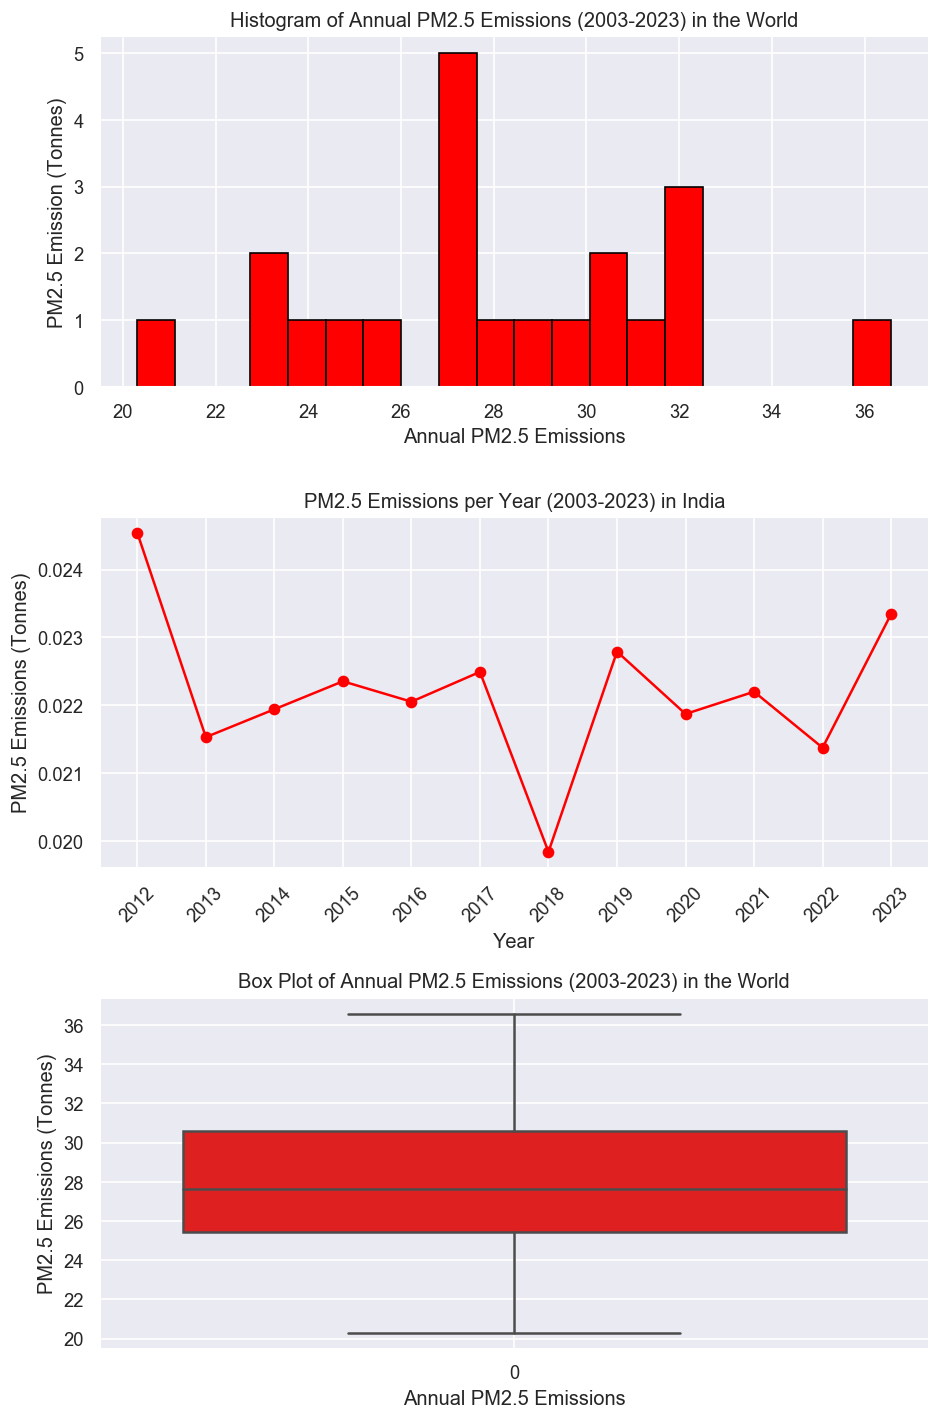

In [407]:
# Convert years and emissions to numpy arrays for World PM2.5 emissions
years_world = np.array(PM25Emissions_2003To2023_OWID_WRL['Year'])
emissions_world = np.array(PM25Emissions_2003To2023_OWID_WRL['Annual PM2.5 emissions from wildfires'])

# Create figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Plotting histogram of World PM2.5 emissions
ax1.hist(emissions_world, bins=20, color='red', edgecolor='black')
ax1.set_title('Histogram of Annual PM2.5 Emissions (2003-2023) in the World')
ax1.set_xlabel('Annual PM2.5 Emissions')
ax1.set_ylabel('PM2.5 Emission (Tonnes)')
ax1.grid(True)

# Plotting line plot of India PM2.5 emissions
ax2.plot(years_india, emissions_india, marker='o', linestyle='-', color='red')
ax2.set_title('PM2.5 Emissions per Year (2003-2023) in India')
ax2.set_xlabel('Year')
ax2.set_ylabel('PM2.5 Emissions (Tonnes)')
ax2.grid(True)
ax2.set_xticks(years_india)
ax2.set_xticklabels(years_india, rotation=45)

# Adding box plot for World PM2.5 emissions
sns.boxplot(data=emissions_world, ax=ax3, color='red')
ax3.set_title('Box Plot of Annual PM2.5 Emissions (2003-2023) in the World')
ax3.set_xlabel('Annual PM2.5 Emissions')
ax3.set_ylabel('PM2.5 Emissions (Tonnes)')
ax3.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### Area Burnt

In [408]:
fliterCountry = 'World'  # Replace 'World' with the Country you want to filter by.
AreaBurnt_2003To2024_OWID_WRL = AreaBurntAnnually_AllCountries_2012To2024_data[AreaBurntAnnually_AllCountries_2012To2024_data['Entity'] == fliterCountry]
print(AreaBurnt_2003To2024_OWID_WRL)

     Entity      Code  Year  Annual_Area_Burnt_per_Wildfire
2340  World  OWID_WRL  2012                        0.024540
2341  World  OWID_WRL  2013                        0.021532
2342  World  OWID_WRL  2014                        0.021942
2343  World  OWID_WRL  2015                        0.022354
2344  World  OWID_WRL  2016                        0.022054
2345  World  OWID_WRL  2017                        0.022493
2346  World  OWID_WRL  2018                        0.019844
2347  World  OWID_WRL  2019                        0.022791
2348  World  OWID_WRL  2020                        0.021873
2349  World  OWID_WRL  2021                        0.022201
2350  World  OWID_WRL  2022                        0.021377
2351  World  OWID_WRL  2023                        0.023345
2352  World  OWID_WRL  2024                        0.005890


In [409]:
# Display summary of each dataframe
print("Summary of Area Burnt Annually:")
print(AreaBurnt_2003To2024_OWID_WRL.info())

# Removing year 2024 data because it is not for complete year.
AreaBurnt_2003To2023_OWID_WRL = AreaBurnt_2003To2024_OWID_WRL[:-1]

# Area Burnt Annually
print("\nSummary statistics and shape of Area Burnt Annually:")
print(AreaBurnt_2003To2023_OWID_WRL['Annual_Area_Burnt_per_Wildfire'].describe())
print("\n\nShape of Area Burnt Annually:", AreaBurnt_2003To2023_OWID_WRL.shape)

Summary of Area Burnt Annually:
<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 2340 to 2352
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          13 non-null     object 
 1   Code                            13 non-null     object 
 2   Year                            13 non-null     int64  
 3   Annual_Area_Burnt_per_Wildfire  13 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 520.0+ bytes
None

Summary statistics and shape of Area Burnt Annually:
count    12.000000
mean      0.022196
std       0.001133
min       0.019844
25%       0.021788
50%       0.022128
75%       0.022567
max       0.024540
Name: Annual_Area_Burnt_per_Wildfire, dtype: float64


Shape of Area Burnt Annually: (12, 4)


In [410]:
# Calculate percentage change between consecutive years
AreaBurnt_2003To2023_OWID_WRL['Percentage_Change'] = AreaBurnt_2003To2023_OWID_WRL['Annual_Area_Burnt_per_Wildfire'].pct_change() * 100

# Print the DataFrame with percentage change
print(AreaBurnt_2003To2023_OWID_WRL)

     Entity      Code  Year  Annual_Area_Burnt_per_Wildfire  Percentage_Change
2340  World  OWID_WRL  2012                        0.024540                NaN
2341  World  OWID_WRL  2013                        0.021532         -12.255707
2342  World  OWID_WRL  2014                        0.021942           1.905198
2343  World  OWID_WRL  2015                        0.022354           1.876661
2344  World  OWID_WRL  2016                        0.022054          -1.343198
2345  World  OWID_WRL  2017                        0.022493           1.989325
2346  World  OWID_WRL  2018                        0.019844         -11.777639
2347  World  OWID_WRL  2019                        0.022791          14.854043
2348  World  OWID_WRL  2020                        0.021873          -4.027041
2349  World  OWID_WRL  2021                        0.022201           1.497962
2350  World  OWID_WRL  2022                        0.021377          -3.712267
2351  World  OWID_WRL  2023                        0

/var/folders/lz/06glpb2526qgqhtf0pvflrz80000gn/T/ipykernel_83811/1807743031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AreaBurnt_2003To2023_OWID_WRL['Percentage_Change'] = AreaBurnt_2003To2023_OWID_WRL['Annual_Area_Burnt_per_Wildfire'].pct_change() * 100


### Area Burnt
### Plotting Stuff

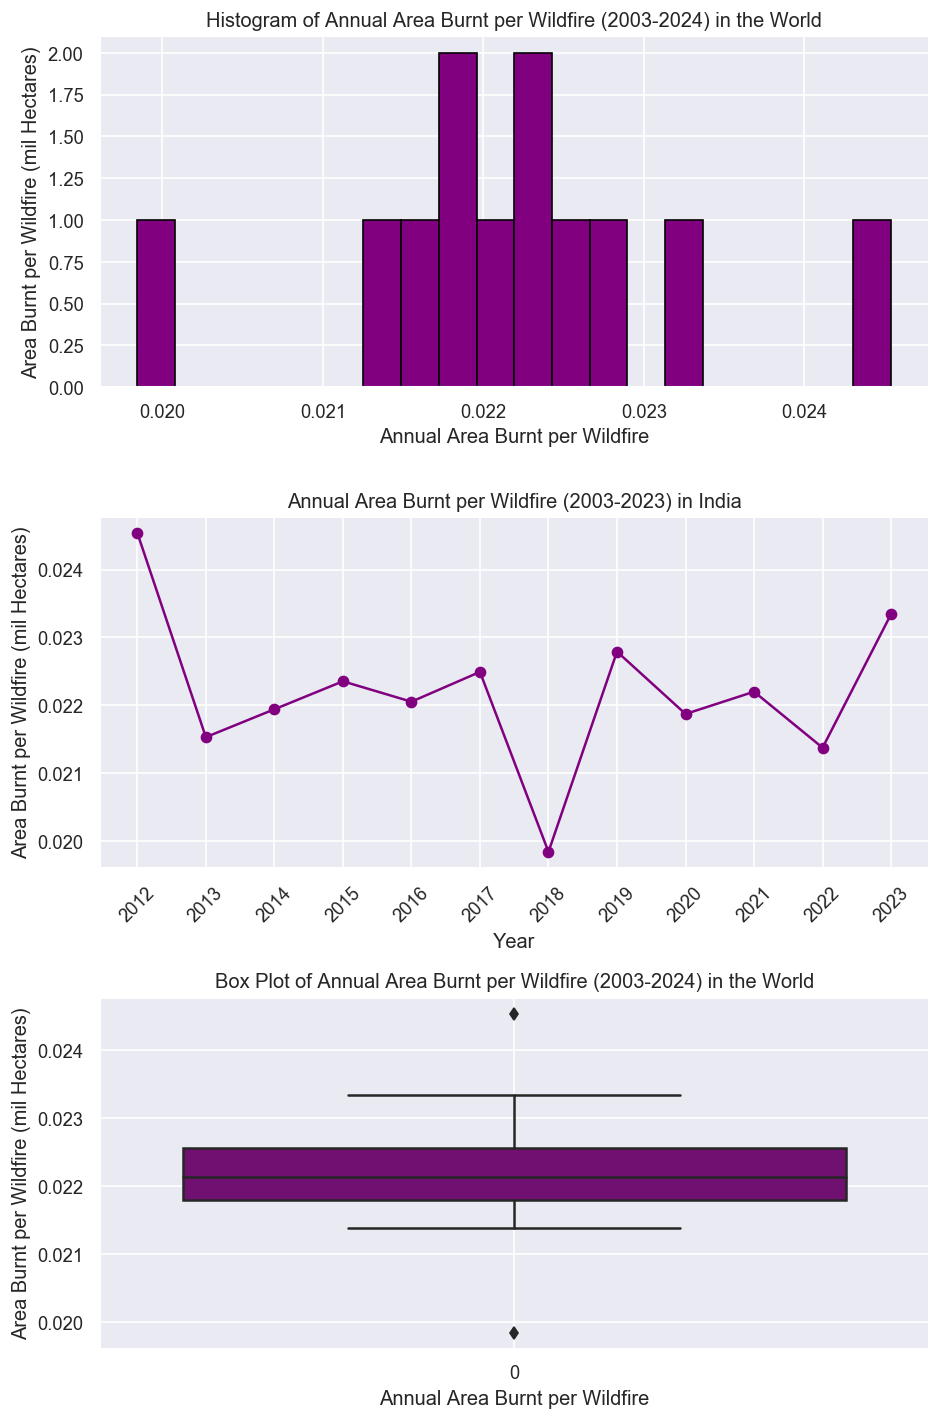

In [411]:
# Convert years and emissions to numpy arrays for World Area Burnt per Wildfire
years_world = np.array(AreaBurnt_2003To2023_OWID_WRL['Year'])
emissions_world = np.array(AreaBurnt_2003To2023_OWID_WRL['Annual_Area_Burnt_per_Wildfire'])

# Create figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))

# Plotting histogram of World Area Burnt per Wildfire
ax1.hist(emissions_world, bins=20, color='purple', edgecolor='black')
ax1.set_title('Histogram of Annual Area Burnt per Wildfire (2003-2024) in the World')
ax1.set_xlabel('Annual Area Burnt per Wildfire')
ax1.set_ylabel('Area Burnt per Wildfire (mil Hectares)')
ax1.grid(True)

# Plotting line plot of India Area Burnt per Wildfire
ax2.plot(years_india, emissions_india, marker='o', linestyle='-', color='purple')
ax2.set_title('Annual Area Burnt per Wildfire (2003-2023) in India')
ax2.set_xlabel('Year')
ax2.set_ylabel('Area Burnt per Wildfire (mil Hectares)')
ax2.grid(True)
ax2.set_xticks(years_india)
ax2.set_xticklabels(years_india, rotation=45)

# Adding box plot for World Area Burnt per Wildfire
sns.boxplot(data=emissions_world, ax=ax3, color='purple')
ax3.set_title('Box Plot of Annual Area Burnt per Wildfire (2003-2024) in the World')
ax3.set_xlabel('Annual Area Burnt per Wildfire')
ax3.set_ylabel('Area Burnt per Wildfire (mil Hectares)')
ax3.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()